<a href="https://colab.research.google.com/github/RezuanChowdhuryRifat/cse299/blob/main/unbalanced-YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset


**Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Git Clone**

In [2]:
# Download YOLOv5 repository and install requirements

%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.7 MB/s eta 0:00:00


**Download dataset from Roboflow**

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ldeIEejOmP71R5mC1C8b")
project = rf.workspace("pet-projects").project("vinbig-qspwe")
dataset = project.version(3).download("yolov5")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=0a80f231cee9d2902e01c1ed088285330910cb2eef54738f762755262af92459
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to vinbig-3 in yolov5pytorch:: 100%|██████████| 8800/8800 [00:49<00:00, 177.63it/s]


**Unzip dataset**

In [4]:
# import os
# !unzip "/content/drive/MyDrive/vinbig.zip" -d "/content/drive/MyDrive"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/vinbig/labels/train/5325bdc682cf5b460a489405dc2369f0_augmented1.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/5325bdc682cf5b460a489405dc2369f0_augmented2.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/53385a96b1681676153e5e8900eaac66_augmented1.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/53385a96b1681676153e5e8900eaac66_augmented2.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/534b124253b5513add03cd3c64d9b5cc_augmented1.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/5386660b78d301f69d170f83885aafe6_augmented1.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/5386660b78d301f69d170f83885aafe6_augmented2.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/53b1a490cd7e3a30e94014bdfd314d14_augmented1.txt  
  inflating: /content/drive/MyDrive/vinbig/labels/train/53b1a490cd7e3a30e94014bdfd314d14_augmented2.t

**Generate data location txt**

In [5]:
# import glob
# import os
# import numpy as np
# import sys


# train_images = "/content/drive/MyDrive/vinbig/images/train"
# val_images = "/content/drive/MyDrive/vinbig/images/val"
# test_images = "/content/drive/MyDrive/vinbig/images/test"
# file_train = open("/content/drive/MyDrive/vinbig/train.txt", "w")
# #file_val = open("val.txt", "w")
# counter = 1

# for pathAndFilename in glob.iglob(os.path.join(train_images, "*.jpg")):
#         title, ext = os.path.splitext(os.path.basename(pathAndFilename))
#         if ext:
#          file_train.write(train_images + "/" + title + '.jpg' + "\n")
#          counter = counter + 1

# file_train.close()

# file_train = open("/content/drive/MyDrive/vinbig/test.txt", "w")
# #file_val = open("val.txt", "w")
# counter = 1

# for pathAndFilename in glob.iglob(os.path.join(test_images, "*.jpg")):
#         title, ext = os.path.splitext(os.path.basename(pathAndFilename))
#         if ext:
#          file_train.write(test_images + "/" + title + '.jpg' + "\n")
#          counter = counter + 1

# file_train.close()
# file_train = open("/content/drive/MyDrive/vinbig/val.txt", "w")
# #file_val = open("val.txt", "w")
# counter = 1

# for pathAndFilename in glob.iglob(os.path.join(val_images, "*.jpg")):
#         title, ext = os.path.splitext(os.path.basename(pathAndFilename))
#         if ext:
#          file_train.write(val_images + "/" + title + '.jpg' + "\n")
#          counter = counter + 1

# file_train.close()

# Fine tuning

In [5]:
%cd /content/drive/MyDrive/yolov5
!python train.py --batch 32 --cfg /content/drive/MyDrive/yolov5/models/yolov5x.yaml --img 512 --epochs 20 --data /content/drive/MyDrive/yolov5/vinbig-3/data.yaml --weights 'yolov5x.pt' --freeze 10 

/content/drive/MyDrive/yolov5
train: weights=yolov5x.pt, cfg=/content/drive/MyDrive/yolov5/models/yolov5x.yaml, data=/content/drive/MyDrive/yolov5/vinbig-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05,

**Evaluation**

In [8]:
%cd /content/drive/MyDrive/yolov5
!python val.py --data /content/drive/MyDrive/yolov5/vinbig-3/data.yaml --img 512 --batch 16 --conf 0.0001 --iou 0.5 --weights /content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt

/content/drive/MyDrive/yolov5
val: data=/content/drive/MyDrive/yolov5/vinbig-3/data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=512, conf_thres=0.0001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86260891 parameters, 0 gradients, 204.0 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5/vinbig-3/test/labels... 879 images, 0 backgrounds, 0 corrupt: 100% 879/879 [00:03<00:00, 265.94it/s]
val: New cache created: /content/drive/MyDrive/yolov5/vinbig-3/test/labels.cache
                 Class     Images  Instances 

#Train from scratch

In [4]:
%cd /content/drive/MyDrive/yolov5
!python train.py --batch 16 --cfg /content/drive/MyDrive/yolov5/models/yolov5x.yaml --img 512 --epochs 20 --data /content/drive/MyDrive/yolov5/vinbig-3/data.yaml --weights 'yolov5x.pt'

/content/drive/MyDrive/yolov5
train: weights=yolov5x.pt, cfg=/content/drive/MyDrive/yolov5/models/yolov5x.yaml, data=/content/drive/MyDrive/yolov5/vinbig-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

**Evaluation**

In [5]:
%cd /content/drive/MyDrive/yolov5
!python val.py --data /content/drive/MyDrive/yolov5/vinbig-3/data.yaml --img 512 --batch 16 --conf 0.0001 --iou 0.5 --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

/content/drive/MyDrive/yolov5
val: data=/content/drive/MyDrive/yolov5/vinbig-3/data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=16, imgsz=512, conf_thres=0.0001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86260891 parameters, 0 gradients, 204.0 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5/vinbig-3/test/labels.cache... 879 images, 0 backgrounds, 0 corrupt: 100% 879/879 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 55/55 [00:59<00:00,  1.08s/it]
  

**Results graph**

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/yolov5/runs/train/exp/F1_curve.png", width=400, height=400))
display(Image("/content/drive/MyDrive/yolov5/runs/train/exp/PR_curve.png", width=400, height=400))
display(Image("/content/drive/MyDrive/yolov5/runs/train/exp/confusion_matrix.png", width=500, height=500))

# SimCLR

**Imports**

In [2]:
import torch
import torch.nn as nn
import torchvision

from torch.utils.data import (
    Dataset,
    DataLoader,
)

from torchvision.datasets import ImageFolder
from torchvision.transforms import (
    RandomResizedCrop,
    RandomHorizontalFlip,
    ColorJitter,
    RandomGrayscale,
    RandomApply,
    Compose,
    GaussianBlur,
    ToTensor,
)
import torchvision.models as models

import os
import glob
import time
from skimage import io
import matplotlib.pyplot as plt

**Augmentation**

In [3]:
def get_complete_transform(output_shape, kernel_size, s=1.0):
    """
    The color distortion transform.
    
    Args:
        s: Strength parameter.
    
    Returns:
        A color distortion transform.
    """
    rnd_crop = RandomResizedCrop(output_shape)
    rnd_flip = RandomHorizontalFlip(p=0.5)
    
    color_jitter = ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = RandomApply([color_jitter], p=0.8)
    
    rnd_gray = RandomGrayscale(p=0.2)
    gaussian_blur = GaussianBlur(kernel_size=kernel_size)
    rnd_gaussian_blur = RandomApply([gaussian_blur], p=0.5)
    to_tensor = ToTensor()
    image_transform = Compose([
        to_tensor,
        rnd_crop,
        rnd_flip,
        rnd_color_jitter,
        rnd_gray,
        rnd_gaussian_blur,
    ])
    return image_transform


class ContrastiveLearningViewGenerator(object):
    """Take two random crops of one image as the query and key."""

    def __init__(self, base_transform, n_views=2):
        self.base_transform = base_transform
        self.n_views = n_views

    def __call__(self, x):
        views = [self.base_transform(x) for i in range(self.n_views)]
        return views

**Unzip dataset**

In [6]:
!unzip /content/drive/MyDrive/vinbig.v3i.yolov5pytorch.zip -d '/content/drive/MyDrive/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/53f8a8327590a490890d3d2acfb08dea_png.rf.0c3f595a7bbaa699fe0645fbca882ed0.jpg  
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/54122627c6aeed581fde506562a73b2e_png.rf.67c28198c2d4e6cf0dd9ceaefaeb5697.jpg  
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/543278633eea00a31aa950d65ad504c3_png.rf.e7cf5e0942b7dc9e1430c2e89fe6c52d.jpg  
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/5448e1c9dcfbf590e62b7e862754fbac_png.rf.ccdbdc38514cecd363e5230a0e14b932.jpg  
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/54513c2ba05c261ea2b2a87455634b1c_png.rf.cc6bb17475d2486475b3eb557709adb2.jpg  
  inflating: /content/drive/MyDrive/vinbig.v3i.yolov5pytorch/train/images/5467a3e2ca866b4295b2e73089fec5fe_png.rf.96544497de7ed516a238dd9b5cfca61d.jpg  
  inflating: /content/drive/MyD

**Custom dataset class**

In [4]:

class CustomDataset(Dataset):


    def __init__(self, list_images, transform=None):
        """
        Args:
            list_images (list): List of all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.list_images = list_images
        self.transform = transform

    def __len__(self):
        return len(self.list_images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = self.list_images[idx]
        image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)

        return image

**Building Dataset**

In [5]:

# The size of the images
output_shape = [224,224]
kernel_size = [21,21] # 10% of the output_shape

# The custom transform
base_transforms = get_complete_transform(output_shape=output_shape, kernel_size=kernel_size, s=1.0)
custom_transform = ContrastiveLearningViewGenerator(base_transform=base_transforms)

ds = CustomDataset(
    list_images=glob.glob("/content/drive/MyDrive/vinbig.v3i.yolov5pytorch/pre-train/*.jpg"),
    transform=custom_transform
)

**Ploat data**

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


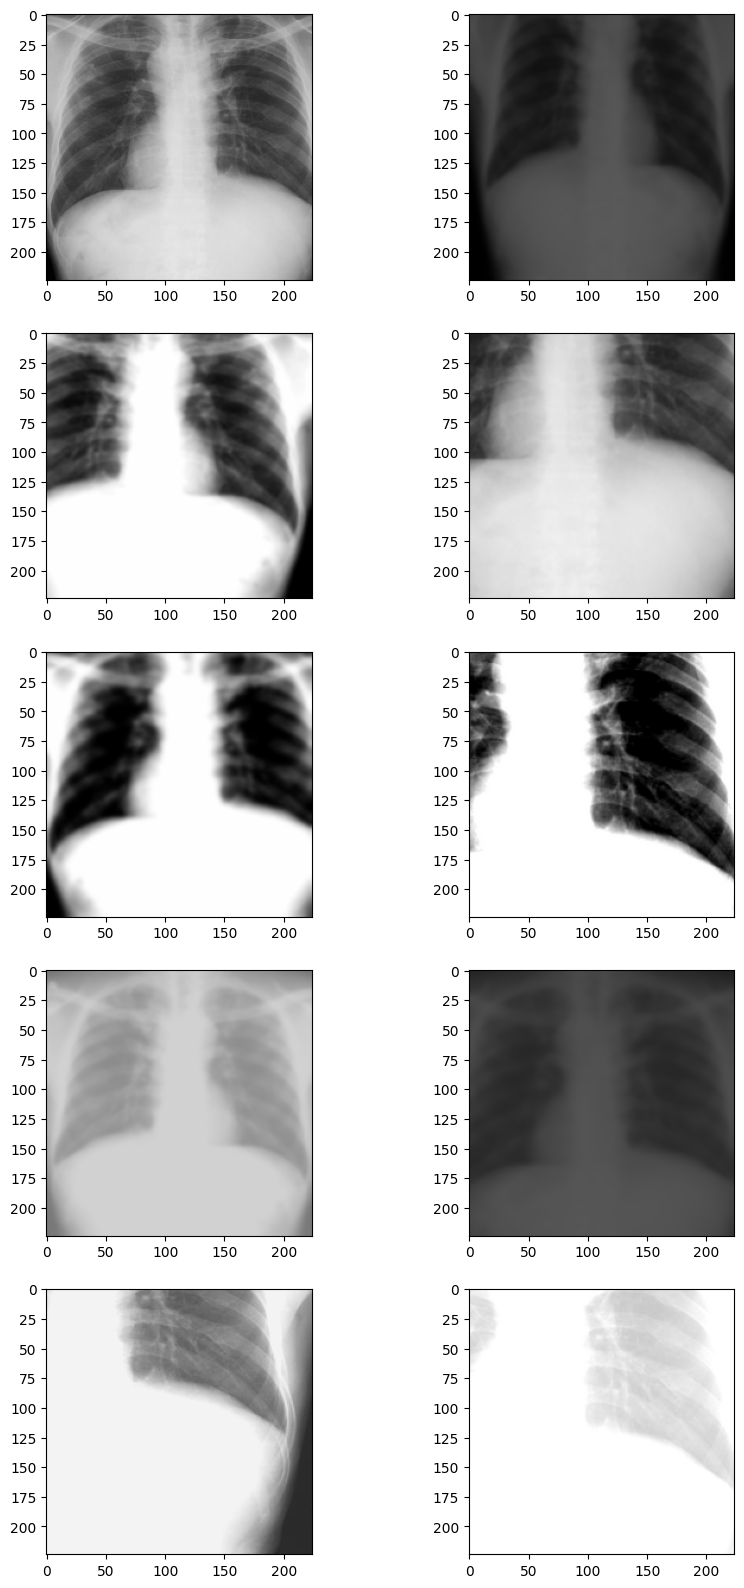

In [6]:
plt.figure(figsize=(10,20))
def view_data(ds, index):
    for i in range(1,6):
        images = ds[index]
        view1, view2 = images
        plt.subplot(5,2,2*i-1)
        plt.imshow(view1.permute(1,2,0))
        plt.subplot(5,2,2*i)
        plt.imshow(view2.permute(1,2,0))

view_data(ds,50)

**Train data loader**

In [7]:
BATCH_SIZE = 32

# Building the data loader
train_dl = torch.utils.data.DataLoader(
    ds,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count(),
    drop_last=True,
    pin_memory=True,
)

**Model**

In [8]:

class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

class SimCLR(nn.Module):
    def __init__(self, linear_eval=False):
        super().__init__()
        self.linear_eval = linear_eval
        resnet50 = models.resnet50(pretrained=False)
        resnet50.fc = Identity()
        self.encoder = resnet50
        self.projection = nn.Sequential(
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Linear(256, 256)
        )
    def forward(self, x):
        if not self.linear_eval:
            x = torch.cat(x, dim=0)
        
        encoding = self.encoder(x)
        projection = self.projection(encoding) 
        return projection

In [9]:

print(f'Torch-Version {torch.__version__}')
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'DEVICE: {DEVICE}')

Torch-Version 2.0.1+cu118
DEVICE: cuda


**Contrastive loss**

In [10]:
LABELS = torch.cat([torch.arange(BATCH_SIZE) for i in range(2)], dim=0)
LABELS = (LABELS.unsqueeze(0) == LABELS.unsqueeze(1)).float() # Creates a one-hot with broadcasting
LABELS = LABELS.to(DEVICE) #128,128

def cont_loss(features, temp):
    """
    The NTxent Loss.
    
    Args:
        z1: The projection of the first branch
        z2: The projeciton of the second branch
    
    Returns:
        the NTxent loss
    """
    similarity_matrix = torch.matmul(features, features.T) # 128, 128
    # discard the main diagonal from both: labels and similarities matrix
    mask = torch.eye(LABELS.shape[0], dtype=torch.bool).to(DEVICE)
    # ~mask is the negative of the mask
    # the view is required to bring the matrix back to shape
    labels = LABELS[~mask].view(LABELS.shape[0], -1) # 128, 127
    similarity_matrix = similarity_matrix[~mask].view(similarity_matrix.shape[0], -1) # 128, 127

    # select and combine multiple positives
    positives = similarity_matrix[labels.bool()].view(labels.shape[0], -1) # 128, 1

    # select only the negatives
    negatives = similarity_matrix[~labels.bool()].view(similarity_matrix.shape[0], -1) # 128, 126

    logits = torch.cat([positives, negatives], dim=1) # 128, 127
    labels = torch.zeros(logits.shape[0], dtype=torch.long).to(DEVICE)

    logits = logits / temp
    return logits, labels

In [11]:
simclr_model = SimCLR().to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
optimizer = torch.optim.Adam(simclr_model.parameters())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


**Training**

In [12]:
EPOCHS = 30
best_loss = float('inf')  # Initialize with a high value
patience = 5  # Number of epochs to wait for improvement
no_improvement_count = 0  # Counter for epochs without improvement

for epoch in range(EPOCHS):
    t0 = time.time()
    running_loss = 0.0
    
    for i, views in enumerate(train_dl):
        projections = simclr_model([view.to(DEVICE) for view in views])
        logits, labels = cont_loss(projections, temp=2)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f'EPOCH: {epoch+1} BATCH: {i+1} LOSS: {(running_loss/100):.4f} ')
            running_loss = 0.0
    
    # Check if current loss is the best so far
    current_loss = running_loss / len(train_dl)
    if current_loss < best_loss:
        best_loss = current_loss
        no_improvement_count = 0  # Reset the counter
        torch.save(simclr_model.state_dict(), '/content/drive/MyDrive/vinbig.v3i.yolov5pytorch/best.pt')  # Save the best model weights
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f'Early stopping at epoch {epoch+1} as no improvement in validation loss')
            break
    
    print(f'Time taken: {((time.time()-t0)/60):.3f} mins')


EPOCH: 1 BATCH: 10 LOSS: 1.6795 
Time taken: 0.861 mins
EPOCH: 2 BATCH: 10 LOSS: 0.4144 
Time taken: 0.749 mins
EPOCH: 3 BATCH: 10 LOSS: 0.4128 
Time taken: 0.733 mins
EPOCH: 4 BATCH: 10 LOSS: 0.4146 
Time taken: 0.777 mins
EPOCH: 5 BATCH: 10 LOSS: 0.4117 
Time taken: 0.743 mins
EPOCH: 6 BATCH: 10 LOSS: 0.4140 
Time taken: 0.752 mins
EPOCH: 7 BATCH: 10 LOSS: 0.4136 
Time taken: 0.755 mins
EPOCH: 8 BATCH: 10 LOSS: 0.4141 
Time taken: 0.743 mins
EPOCH: 9 BATCH: 10 LOSS: 0.4113 
Early stopping at epoch 9 as no improvement in validation loss
